In [1]:
import pickle
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns

C:\Users\assas\AppData\Local\Temp\ipykernel_7104\1201726988.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
test = pd.read_csv('../../SIFTextraction/fracatlas/test.csv')

X_test = test.drop(columns=['image_id', 'label'])
y_test = test['label']

In [3]:
svc = pickle.load(open('./models/svc.pkl', 'rb'))
dt = pickle.load(open('./models/dt.pkl', 'rb'))

SVM results:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       674
           1       0.36      0.45      0.40       143

    accuracy                           0.76       817
   macro avg       0.62      0.64      0.62       817
weighted avg       0.78      0.76      0.77       817

Confusion Matrix:


<Axes: >

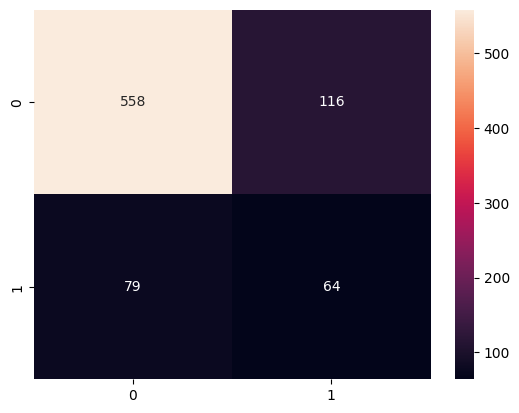

In [4]:
y_pred = svc.predict(X_test)
print("SVM results:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')

DecisionTree results:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       674
           1       0.40      0.45      0.42       143

    accuracy                           0.79       817
   macro avg       0.64      0.65      0.65       817
weighted avg       0.80      0.79      0.79       817

Confusion Matrix:


<Axes: >

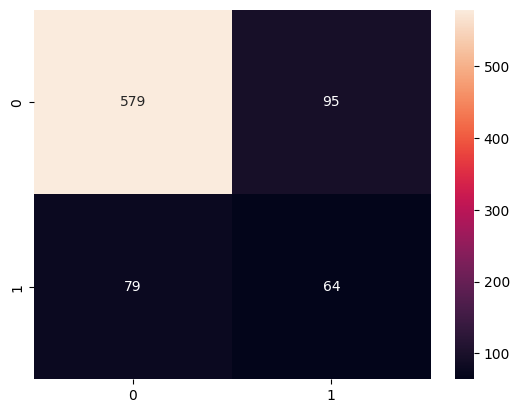

In [5]:
y_pred = dt.predict(X_test)
print("DecisionTree results:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_test.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

model.load_weights('./models/nn.h5')

26/26 [==============================] - 2s 5ms/step
MLP results:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       674
           1       0.46      0.52      0.49       143

    accuracy                           0.81       817
   macro avg       0.68      0.69      0.68       817
weighted avg       0.82      0.81      0.81       817

Confusion Matrix:


<Axes: >

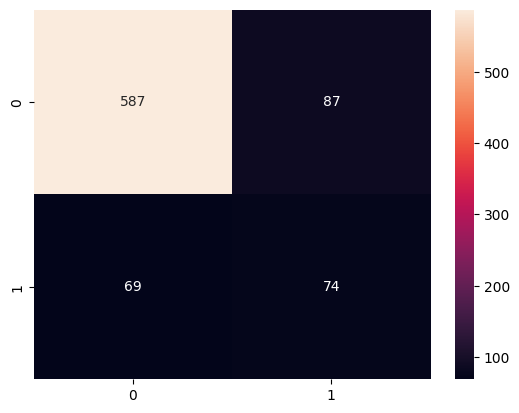

In [7]:
y_pred = model.predict(np.asarray(X_test).astype('float32'))
y_pred_binary = np.round(y_pred)

print("MLP results:")
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred_binary),annot = True,fmt='d')